## Preprocesamiento de Datos para el Modelo de Regresión

En esta sección, nos enfocaremos en preparar los datos para nuestro modelo de regresión. Realizaremos transformaciones necesarias, como el one-hot encoding para las variables categóricas y la normalización Z para las columnas numéricas.

### Paso 1: Lectura del Conjunto de Datos

Comenzaremos leyendo el conjunto de datos desde el archivo 'cars.csv' utilizando la biblioteca pandas. Esto nos permitirá cargar los datos en un DataFrame para su posterior procesamiento.

In [1]:
import pandas as pd
cars = pd.read_csv(r"C:\Users\Gary Alexander Bean\Desktop\Proyecto-Integrador-M6\database\ML_cars limpio.csv")
cars.head()

,car_id,marca,modelo,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,clasificacion_precio,calificacion_riesgo
0,1,alfa romeo,giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,0,Extremadamente Riesgoso
1,2,alfa romeo,stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,0,Extremadamente Riesgoso
2,3,alfa romeo,quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,0,Riesgoso
3,4,audi,a6,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,0,Muy Riesgoso
4,5,audi,a6,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,0,Muy Riesgoso


## Paso 2: Transformación de Variables Categóricas a Variables Dummy

A continuación, llevaremos a cabo la transformación de las variables categóricas en variables dummy utilizando la técnica de one-hot encoding. Este proceso nos permitirá representar las variables categóricas como variables binarias, lo que facilitará su inclusión en modelos de regresión.

In [2]:
# Lista de Columnas Categóricas para Transformación en Variables Dummy
categorical_columns = cars[['fuel_type', 'aspiration', 'door_number', 'car_body',
                             'engine_location', 'drive_wheel', 'engine_type', 'cylinder_number',
                             'fuel_system']]

# Creación del DataFrame con el resto de las columnas
cars2 = cars.drop(categorical_columns, axis=1)

# Transformación de Variables Categóricas en Variables Dummy
categorical_columns_dummies = pd.get_dummies(categorical_columns, dtype=int, drop_first=True)

# Concatenación de ambos DataFrames para obtener todas las columnas
cars = pd.concat([cars2, categorical_columns_dummies], axis=1)

# Imprimir las columnas del DataFrame resultante
print(cars.columns)

Index(['car_id', 'marca', 'modelo', 'wheel_base', 'car_length', 'car_width',
       'car_height', 'curb_weight', 'engine_size', 'bore_ratio', 'stroke',
       'compression_ratio', 'horse_power', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'clasificacion_precio', 'calificacion_riesgo',
       'door_number', 'cylinder_number', 'fuel_type_gas', 'aspiration_turbo',
       'car_body_hardtop', 'car_body_hatchback', 'car_body_sedan',
       'car_body_wagon', 'engine_location_rear', 'drive_wheel_fwd',
       'drive_wheel_rwd', 'engine_type_dohcv', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
       'engine_type_rotor', 'fuel_system_2bbl', 'fuel_system_4bbl',
       'fuel_system_idi', 'fuel_system_mfi', 'fuel_system_mpfi',
       'fuel_system_spdi', 'fuel_system_spfi'],
      dtype='object')


### Paso 3: Transformación de Columnas Numéricas
Después de la transformación de las variables categóricas, procederemos a normalizar las columnas numéricas utilizando la estandarización Z. Esta técnica asegura que las características numéricas tengan una media de 0 y una desviación estándar de 1, lo que ayuda a mantener la escala y a mejorar el rendimiento de los modelos de regresión.

In [3]:
#Importamos la libreria
from sklearn.preprocessing import StandardScaler



# Columnas numéricas 
numeric_columns = ['wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
                                   'engine_size', 'bore_ratio', 'stroke', 'compression_ratio',
                                   'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

# Creación de dataframe que solo incluya las columnas numéricas
df_numeric_columns = cars[numeric_columns]

#Creación de dataframe con las columnas originales
cars2 = cars.drop(numeric_columns, axis=1)

# Aplicar la estandarización Z a las columnas numéricas
scaler = StandardScaler()
numeric_columns_standardized = scaler.fit_transform(df_numeric_columns)
numeric_columns_standardized_df = pd.DataFrame(numeric_columns_standardized, columns=numeric_columns)

# Combinar las columnas estandarizadas con las categóricas dummy y otras columnas originales
cars = pd.concat([numeric_columns_standardized_df, cars2], axis=1)

cars.head()

,wheel_base,car_length,car_width,car_height,curb_weight,engine_size,bore_ratio,stroke,compression_ratio,horse_power,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,0,1,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,0,0,0,0,0,0,0,1,0,0


### Paso 4: Agregación de la columna "gama"
En esta etapa del proceso, estaremos agregando una nueva columna llamada "gama" a nuestro conjunto de datos. Esta columna servirá como una medida de la categoría de precio de cada automóvil, clasificándolos en dos grupos: económicos y costosos.

## Método de clasificación:
Utilizaremos la mediana de la columna de precios como punto de referencia para la clasificación de los automóviles.

Si el precio de un automóvil es igual o menor que la mediana de los precios, lo consideraremos económico y asignaremos un valor de 1 a la columna "gama".

Por otro lado, si el precio es mayor que la mediana, clasificaremos el automóvil como costoso y asignaremos un valor de 0 a la columna "gama".

Este enfoque nos permitirá tener una medida binaria simple pero efectiva de la gama de precios de cada automóvil en nuestro conjunto de datos.

In [4]:
# Calcular la mediana de la columna "prices"
mediana = cars["price"].median()

# Crear la nueva columna "clasificacion_precio" basada en la mediana
cars["clasificacion_precio"] = (cars["price"] <= mediana).astype(int)

# Conteo de valores por categoría
print(cars['clasificacion_precio'].value_counts())

clasificacion_precio
1    103
0    102
Name: count, dtype: int64


## Clasificación de Automóviles
En esta sección, se realizará una comparación entre siete modelos de aprendizaje supervisado para clasificar automóviles como económicos o costosos. El objetivo es determinar qué modelo es el más efectivo para esta tarea. Se empleará validación cruzada para evaluar el rendimiento de los modelos en los datos de entrenamiento, y se utilizará SequentialFeatureSelector de la biblioteca scikit-learn para seleccionar las características más relevantes.

## Modelos Utilizados:
- **Árbol de Decisiones (DecisionTree)**
- **Bosque Aleatorio (RandomForest)**
- **Regresión Logística (LogisticRegression)**
- **Máquina de Vectores de Soporte (SVM)**
- **K Vecinos Más Cercanos (KNeighbors)**
- **Naive Bayes (NaiveBayes)**
- **Potenciación del Gradiente (GradientBoosting)**

## 1. Importación de Bibliotecas
Para comenzar, importaremos las bibliotecas necesarias para llevar a cabo nuestro análisis.

In [ ]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,  KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from time import time
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


warnings.filterwarnings("ignore")

### Paso 2:Creación de la Función de Validación Cruzada
La función validacion_cruzada ha sido diseñada para evaluar el rendimiento de un modelo de clasificación mediante el uso de validación cruzada K-Fold.

## Listas de Métricas:
Se crean listas para almacenar las métricas clave en cada iteración de la validación cruzada, incluyendo precisión, recall, especificidad, área bajo la curva (AUC) y exactitud.

## Bucle de Validación Cruzada:
Se itera sobre los conjuntos de entrenamiento y prueba generados por K-Fold.
Se ajusta el modelo al conjunto de entrenamiento.
Se realizan predicciones en el conjunto de prueba.
Se calculan y almacenan las métricas de desempeño en las listas correspondientes.
Cálculo de Métricas Promedio:
Se calcula el promedio de las métricas obtenidas en todas las iteraciones, incluyendo precisión, recall, especificidad y AUC.

## Retorno de Resultados:
La función retorna las métricas promedio, proporcionando una visión general del rendimiento del modelo.

In [6]:
def validacion_cruzada(model, X, y, cv=5):
    
    '''
    model : Es el modelo que se va a evaluar
    X: variables independientes
    y: Variable dependiente
    cv : Número de iteracciones , por defecto son 5
    '''
    np.random.seed(2023)
    accuracies, precisions, recalls, specificities, auc_scores = [], [], [], [], []

    for train_idx, test_idx in KFold(n_splits=cv, shuffle=True,random_state=2023).split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        specificities.append(specificity)

        # Calcular el AUC y agregarlo a la lista
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        auc_scores.append(auc)

    # Calcular el promedio de las métricas
    accuracy = np.mean(accuracies)
    precision = np.mean(precisions)
    recall = np.mean(recalls)
    specificity = np.mean(specificities)
    auc_avg = np.mean(auc_scores)


    return accuracy, precision, recall, specificity, auc_avg

### Paso 3: Creación de la Función Grid Search
La función grid_search_cv se utiliza para realizar una búsqueda de hiperparámetros mediante validación cruzada.

## Entradas de la Función:
- **model:** El modelo de machine learning que se va a optimizar.
- **param_grid:** El conjunto de hiperparámetros a evaluar.
- **X e y:** Los datos de entrada y las etiquetas, respectivamente.
- **cv:** El número de divisiones en la validación cruzada (por defecto, K=5).

## Creación del Objeto GridSearchCV:
Se instancia un objeto GridSearchCV con el modelo, el conjunto de hiperparámetros y el método de evaluación (en este caso, roc_auc para el área bajo la curva).

## Ejecución de la Búsqueda:
La función ajusta el modelo a los datos utilizando todas las combinaciones posibles de hiperparámetros, evaluando el rendimiento mediante validación cruzada.

## Retorno del Resultado:
La función retorna el objeto GridSearchCV que contiene los resultados de la búsqueda, incluyendo los mejores hiperparámetros encontrados y el rendimiento asociado.

In [7]:
def grid_search_cv(model, param_grid, X, y, cv=5):
    np.random.seed(2023)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc')
    grid_search.fit(X, y)

    return grid_search

### Paso 4: Función de Entrenamiento y Evaluación del Modelo
La función entrenamiento_evaluacion_modelo realiza el entrenamiento y evaluación de un modelo de clasificación.

### Preparación de los Datos de Entrenamiento y Prueba:
Se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando train_test_split.

## Selección de Características:
Se utiliza el algoritmo SequentialFeatureSelector para seleccionar las características más relevantes mediante eliminación hacia atrás.
Se imprime la lista de características seleccionadas.

## Búsqueda de Hiperparámetros Óptimos:
Se realiza una búsqueda de hiperparámetros utilizando la función grid_search_cv con el modelo base y el conjunto de características seleccionadas.

## Impresión de Resultados del Entrenamiento:
Se imprime la información sobre el modelo seleccionado, incluyendo los mejores parámetros.

## Validación Cruzada en Datos de Entrenamiento:
Se realiza la validación cruzada en los datos de entrenamiento y se imprimen las métricas obtenidas.

## Resultados en Datos de Prueba:
Se evalúa el modelo en los datos de prueba y se imprimen las métricas, la matriz de confusión y la curva ROC.

## Visualización de Resultados:
Se visualizan la matriz de confusión y la curva ROC para proporcionar una comprensión visual del rendimiento del modelo.

## Retorno de Resultados:
La función retorna un DataFrame que resume las métricas del modelo y sus resultados.

In [8]:
# Definicion de variables independientes y dependientes
X = cars.drop(columns=["car_id",  "clasificacion_precio", "price"])
y = cars["clasificacion_precio"]

#Convertir caracteristicas categoricas a variables dummy
X = pd.get_dummies(X)

In [9]:
def entrenamiento_evaluacion_modelo(model_name, X, y, cv=5):
    np.random.seed(2023)
    
    #División de los conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)
    
    #Iniciamos la medición del tiempo
    start = time()

    #Verificamos que el modelo se encuentre en el diccionario models
    if model_name not in models:
        raise ValueError(f"Model {model_name} no se encuentra en el diccionario.")

    base_model, param_grid = models[model_name]

    # Buscador de las mejores características
    print(f"Buscando las mejores características para {model_name}...")
    
    feature_selector = SequentialFeatureSelector(
        base_model,
        n_features_to_select="auto",
        direction="backward",
        scoring="accuracy",
        tol=-1e-3,
        n_jobs=-1,
    )

    # Ajustar el selector de características
    feature_selector.fit(X_train, y_train)

    # Obtener las características seleccionadas
    selected_features = X_train.columns[feature_selector.support_]

    #Imprimimos las caracteristicas seleccionadas
    print(f"Características seleccionadas ({len(selected_features)}): {', '.join(selected_features)}")

    # Llamamos la función grid_search_cv para buscar los mejores hiperparametros
    grid_result = grid_search_cv(base_model, param_grid, X_train[selected_features], y_train, cv=cv)
    best_model = grid_result.best_estimator_


    #Imprimimos los mejores hiperparámetros
    print("\nInformación sobre el modelo seleccionado:")
    print(f"Mejores hiperparámetros: {grid_result.best_params_}")

    # Imprimimos los resultados de la validación cruzada del conjunto de entrenamiento
    print("\nResultados validación cruzada de los datos de entrenamiento:")
    accuracy, precision, recall, specificity, auc_avg = validacion_cruzada(best_model, X_train[selected_features], y_train, cv=cv)
    print(f"Exactitud: {accuracy:.3f} ")
    print(f"Precisión: {precision:.3f}")
    print(f"Sensibilidad: {recall:.3f}")
    print(f"Especificidad: {specificity:.3f}")
    print(f"AUC: {auc_avg:.3f}")
    
    #Finalizamos el contador de tiempo
    end = time()


    print(f"Tiempo de ejecución {end - start:.3f}s")

    #Creamos el dataframe con las métricas obtenidas
    metrics_df = pd.DataFrame({
        'Modelo': [model_name],
        'Exactitud': [accuracy],
        'Precisión': [precision],
        'Sensibilidad': [recall],
        'AUC': [auc_avg],
        'Tiempo de Ejecución (s)': [round(end - start,3)]
    })

    #Hacemos predicciones con nuestro conjunto de pruebas
    y_pred = best_model.predict(X_test[selected_features])

    #Obtenemos la matrix de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcular métricas del conjunto de pruebas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)  

    # Calcular la especificidad
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    #Imprimir la matriz de confusión y métricas 
    
    print("\nMétricas de los datos de pruebas:")
    print(f"Exactitud: {accuracy:.3f}")
    print(f"Precisión: {precision:.3f}")
    print(f"Sendibilidad: {recall:.3f}")
    print(f"Especificidad: {specificity:.3f}")
    print(f"AUC: {roc_auc:.3f}")

    # Calcula la probabilidad de predicción para las clases para la curva ROC
    y_prob = best_model.predict_proba(X_test[selected_features])[:, 1]

    #Creación de las gráficas
    plt.figure(figsize=(12, 8))

    # Subplot para la Matriz de Confusión
    plt.subplot(2, 2, 3)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Costoso", "Económico"], yticklabels=["Costoso", "Económico"])
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicción")
    plt.ylabel("Actual")

    # Subplot para la Curva ROC
    plt.subplot(2, 2, 4)
    fpr, tpr, limite = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")

    plt.tight_layout()  
    plt.show()


    return metrics_df



### Paso 6: Definición del Diccionario de Modelos (models)
A continuación, definiremos el diccionario models, el cual contendrá los modelos a evaluar junto con sus respectivos hiperparámetros. Este diccionario será utilizado en la función grid_search_cv para llevar a cabo la búsqueda de hiperparámetros.

El diccionario models se estructurará de la siguiente manera:

In [10]:
models = {
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}),
    'KNeighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}),
    'NaiveBayes': (GaussianNB(), {}),
    'GradientBoosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]})
}


### Paso 7: Evaluación y Entrenamiento de los Modelos
Ahora nos adentramos en la fase de evaluación y entrenamiento de los modelos utilizando las funciones previamente definidas. Utilizaremos el diccionario models para evaluar varios modelos con distintas configuraciones de hiperparámetros.

### Árbol de decisión
Comenzaremos evaluando el modelo de Árbol de Decisión. Utilizaremos la función grid_search_cv para buscar los mejores hiperparámetros y luego entrenaremos y evaluaremos el modelo utilizando la función entrenamiento_evaluacion_modelo.

Buscando las mejores características para DecisionTree...


Características seleccionadas (110): car_width, compression_ratio, highway_mpg, marca_nissan, marca_peugeot, marca_renault, modelo_1131 deluxe sedan, modelo_12tl, modelo_144ea, modelo_244dl, modelo_245, modelo_411 (sw), modelo_5 gtl, modelo_5000, modelo_5000s (diesel), modelo_504, modelo_504 (sw), modelo_505s turbo diesel, modelo_604sl, modelo_626, modelo_80, modelo_99, modelo_a6, modelo_baja, modelo_boxter, modelo_brz, modelo_carina, modelo_cayenne, modelo_celica, modelo_challenger se, modelo_civic, modelo_clipper, modelo_colt, modelo_corolla, modelo_cougar, modelo_cressida, modelo_cricket, modelo_d-max, modelo_d200, modelo_dart custom, modelo_dasher, modelo_dayz, modelo_diesel, modelo_dl, modelo_duster, modelo_electra 225 custom, modelo_fuga, modelo_fury, modelo_g4, modelo_giulia, modelo_glc, modelo_gt-r, modelo_impala, modelo_juke, modelo_kicks, modelo_lancer, modelo_latio, modelo_leaf, modelo_macan, modelo_mirage, modelo_model 111, modelo_monaco (sw), modelo_monte carlo, modelo_mon

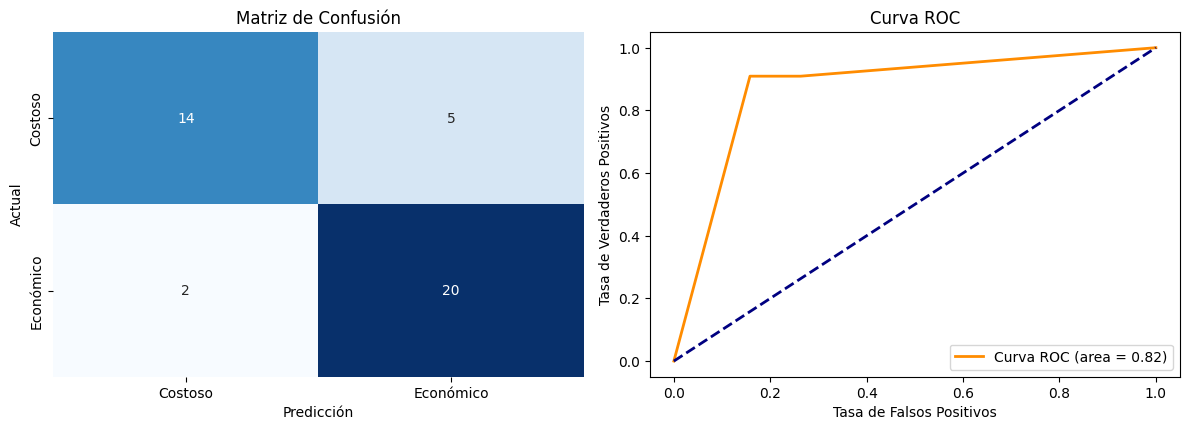

In [40]:
metrics_decision_tree = entrenamiento_evaluacion_modelo("DecisionTree", X, y, cv=5)


Buscando las mejores características para RandomForest...
Características seleccionadas (169): wheel_base, car_length, car_width, car_height, curb_weight, engine_size, bore_ratio, stroke, compression_ratio, horse_power, peak_rpm, city_mpg, highway_mpg, door_number, fuel_type_gas, aspiration_turbo, car_body_hardtop, car_body_hatchback, car_body_sedan, car_body_wagon, engine_location_rear, drive_wheel_fwd, drive_wheel_rwd, engine_type_dohcv, engine_type_l, engine_type_ohc, engine_type_ohcf, engine_type_ohcv, engine_type_rotor, fuel_system_2bbl, fuel_system_4bbl, fuel_system_idi, fuel_system_mfi, fuel_system_mpfi, fuel_system_spdi, fuel_system_spfi, marca_alfa romeo, marca_audi, marca_bmw, marca_buick, marca_chevrolet, marca_dodge, marca_honda, marca_isuzu, marca_jaguar, marca_mazda, marca_mercury, marca_mitsubishi, marca_nissan, marca_peugeot, marca_plymouth, marca_porsche, marca_renault, marca_saab, marca_subaru, marca_toyota, marca_volkswagen, marca_volvo, modelo_1131 deluxe sedan, mod

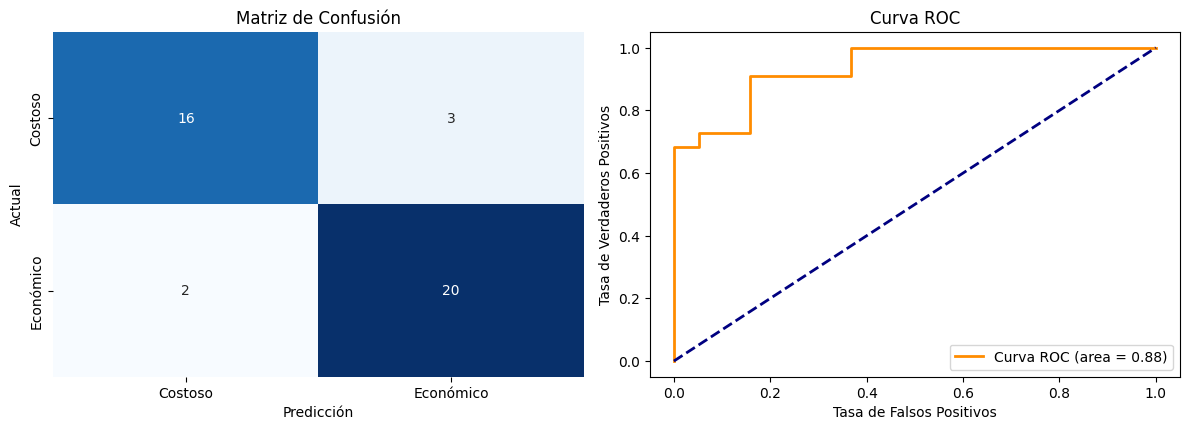

In [41]:
# Bosque Aleatorio
metrics_random_forest=entrenamiento_evaluacion_modelo("RandomForest", X, y, cv=5)

Buscando las mejores características para LogisticRegression...
Características seleccionadas (158): wheel_base, car_length, car_width, car_height, engine_size, bore_ratio, stroke, compression_ratio, horse_power, peak_rpm, city_mpg, highway_mpg, door_number, cylinder_number, fuel_type_gas, aspiration_turbo, car_body_hardtop, car_body_hatchback, car_body_sedan, car_body_wagon, engine_location_rear, drive_wheel_fwd, drive_wheel_rwd, engine_type_dohcv, engine_type_l, engine_type_ohc, engine_type_ohcf, engine_type_ohcv, engine_type_rotor, fuel_system_2bbl, fuel_system_4bbl, fuel_system_idi, fuel_system_mpfi, fuel_system_spdi, marca_alfa romeo, marca_audi, marca_bmw, marca_buick, marca_chevrolet, marca_dodge, marca_honda, marca_isuzu, marca_jaguar, marca_mazda, marca_mercury, marca_mitsubishi, marca_nissan, marca_peugeot, marca_plymouth, marca_porsche, marca_renault, marca_saab, marca_subaru, marca_toyota, marca_volkswagen, marca_volvo, modelo_1131 deluxe sedan, modelo_12tl, modelo_144ea, m

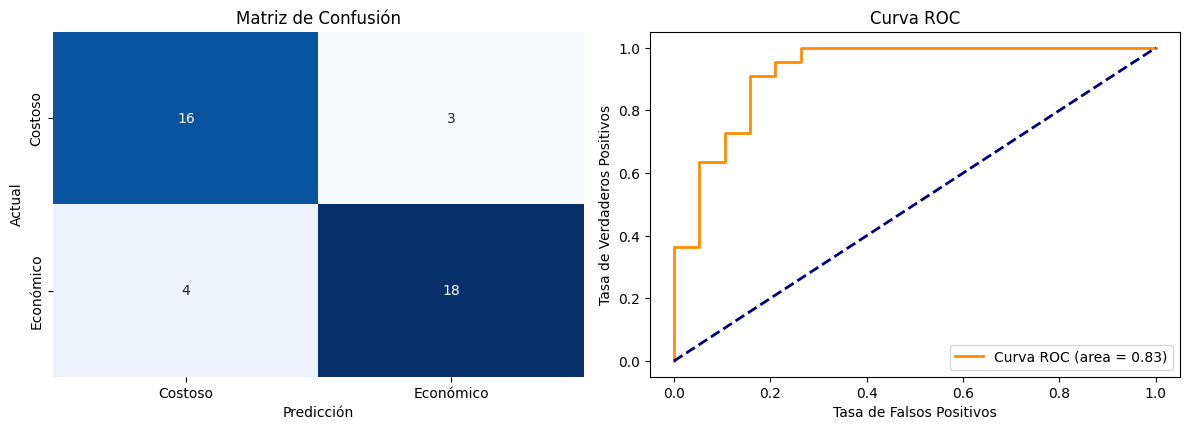

In [42]:
# Regresion Logistica
metrics_logistic_regression=entrenamiento_evaluacion_modelo("LogisticRegression", X, y, cv=5)

In [18]:
# Máquina de vectores de soporte
metrics_svm=entrenamiento_evaluacion_modelo("SVM", X, y, cv=5)

Buscando las mejores características para SVM...


Características seleccionadas (20): curb_weight, horse_power, city_mpg, drive_wheel_fwd, fuel_system_2bbl, fuel_system_idi, fuel_system_mpfi, marca_audi, marca_renault, modelo_corolla, modelo_dasher, modelo_rabbit, modelo_starlet, modelo_tribeca, modelo_z4, calificacion_riesgo_Extremadamente Riesgoso, calificacion_riesgo_Muy Riesgoso, calificacion_riesgo_Neutral, calificacion_riesgo_Riesgoso, calificacion_riesgo_Seguro

Información sobre el modelo seleccionado:
Mejores hiperparámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Resultados validación cruzada de los datos de entrenamiento:


AttributeError: This 'SVC' has no attribute 'predict_proba'

Buscando las mejores características para KNeighbors...


Características seleccionadas (22): bore_ratio, stroke, horse_power, peak_rpm, city_mpg, highway_mpg, door_number, cylinder_number, drive_wheel_rwd, fuel_system_2bbl, fuel_system_spdi, marca_mazda, marca_mitsubishi, marca_peugeot, marca_toyota, modelo_corolla, modelo_d-max, modelo_rx-7 gs, calificacion_riesgo_Muy Riesgoso, calificacion_riesgo_Neutral, calificacion_riesgo_Poco Seguro, calificacion_riesgo_Riesgoso

Información sobre el modelo seleccionado:
Mejores hiperparámetros: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

Resultados validación cruzada de los datos de entrenamiento:
Exactitud: 0.933 
Precisión: 0.919
Sensibilidad: 0.950
Especificidad: 0.911
AUC: 0.973
Tiempo de ejecución 739.541s

Métricas de los datos de pruebas:
Exactitud: 0.805
Precisión: 0.769
Sendibilidad: 0.909
Especificidad: 0.684
AUC: 0.797


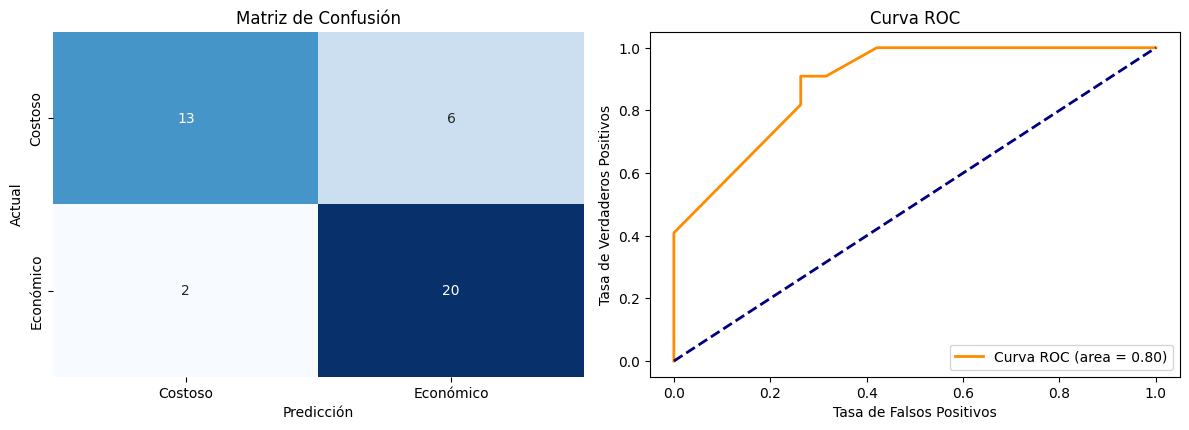

In [17]:
# K vecinos más cercanos
metrics_kneighbors=entrenamiento_evaluacion_modelo("KNeighbors", X, y, cv=5)

Buscando las mejores características para NaiveBayes...
Características seleccionadas (16): cylinder_number, marca_alfa romeo, marca_chevrolet, marca_peugeot, marca_porsche, marca_volvo, modelo_320i, modelo_99, modelo_a6, modelo_century, modelo_rx-7 gs, modelo_rx3, modelo_satellite custom (sw), modelo_super beetle, modelo_tribeca, modelo_type 3

Información sobre el modelo seleccionado:
Mejores hiperparámetros: {}

Resultados validación cruzada de los datos de entrenamiento:
Exactitud: 0.866 
Precisión: 0.783
Sensibilidad: 1.000
Especificidad: 0.737
AUC: 0.897
Tiempo de ejecución 816.517s

Métricas de los datos de pruebas:
Exactitud: 0.829
Precisión: 0.759
Sendibilidad: 1.000
Especificidad: 0.632
AUC: 0.816


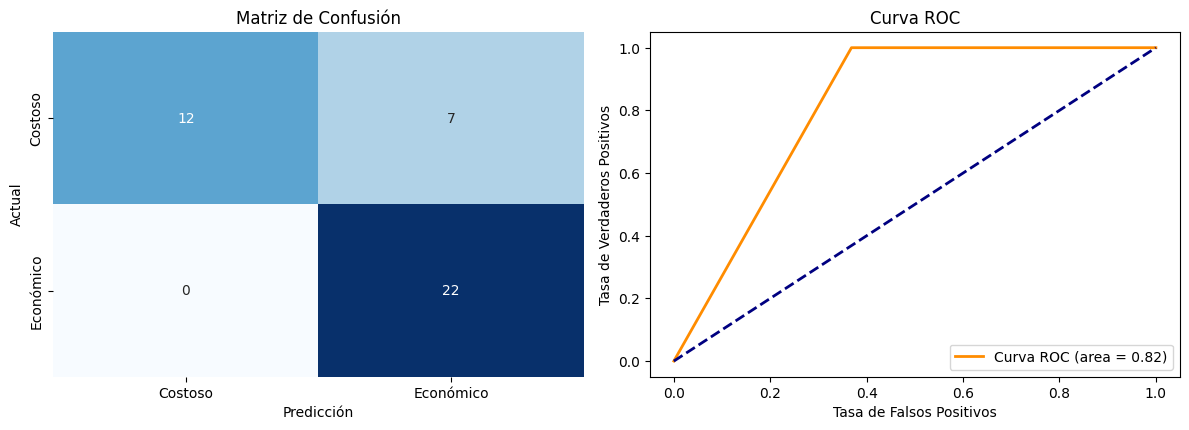

In [16]:
# Naive Bayes
metrics_naives_bayes=entrenamiento_evaluacion_modelo("NaiveBayes", X, y, cv=5)

In [ ]:
# Potenciación del gradiente
metrics_gradient_boosting=entrenamiento_evaluacion_modelo("GradientBoosting", X, y, cv=5)

## Resultados

En la siguiente tabla se presentan los resultados obtenidos de los modelos de clasificación utilizados en el proyecto. Estas métricas clave evalúan el rendimiento de cada modelo en la tarea de clasificación de automóviles en categorías de costos.

Las métricas incluidas son:

- **Exactitud (Accuracy):** Proporción total de predicciones correctas.
- **Precisión (Precision):** Proporción de instancias positivas identificadas correctamente.
- **Sensibilidad (Recall):** Proporción de instancias positivas identificadas correctamente respecto al total de instancias positivas reales.
- **Especificidad (Specificity):** Proporción de instancias negativas identificadas correctamente respecto al total de instancias negativas reales.
- **Área bajo la Curva (AUC):** Área bajo la curva ROC, proporcionando una métrica global del rendimiento del modelo en la clasificación binaria.
- **Tiempo de Ejecución:** El tiempo requerido para entrenar y evaluar cada modelo.

Estas métricas nos ofrecen una visión completa del desempeño de cada modelo en términos de su capacidad para clasificar adecuadamente los automóviles según su categoría de costo, junto con la eficiencia en tiempo de cada modelo.


In [ ]:
final_results = pd.concat([metrics_decision_tree, metrics_random_forest, metrics_logistic_regression,
                           metrics_svm, metrics_kneighbors, metrics_naives_bayes, metrics_gradient_boosting], ignore_index=True)

# Obtener las columnas numéricas para aplicar el estilo solo a ellas
numeric_columns = final_results.select_dtypes(include=[float]).columns

# Aplicar formato en negrita solo a las columnas numéricas
styled_final_results = final_results.style.apply(lambda col: ['font-weight: bold' if val == col.max() else '' for val in col], axis=0, subset=numeric_columns)

# Mostrar el dataframe estilizado con la columna 'Modelo' concatenada
styled_final_results

En la tabla, se destacan en **negritas** los valores más altos de cada métrica. Considerando que nuestro dataset está balanceado, la exactitud es un buen indicador del desempeño del modelo. Notamos que, en el conjunto de entrenamiento, el modelo de Naive Bayes lidera con la mayor exactitud. No obstante, al evaluar los conjuntos de pruebas, el Árbol de Decisión logra la exactitud más alta. Aunque en el conjunto de entrenamiento ocupa el segundo lugar en la métrica de exactitud, para este conjunto de datos específico, el modelo más adecuado resulta ser el Árbol de Decisión.
